# Unsupervised Learning

This notebook contains code and analysis for a K-Means clustering algorithm and a small neural network both trained on the seeds dataset. All data has been previously cleaned and prepared in separate notebooks. Performance will be compared, along with that of models from the Logistic_Regression notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


In [2]:
# Read the data into a dataframe
seeds = pd.read_csv('seeds.csv')

# Create versions of X and y with dropped superfluous columns
X = seeds.drop(['compactness', 'class'], axis=1)
X2 = seeds.drop(['compactness', 'perimeter', 'class'], axis=1)
X3 = seeds.drop(['compactness', 'area', 'class'], axis=1)

y = seeds.loc[:,'class']

# Display the seeds dataframe
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [3]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=.2, random_state=42)

## K-means Clustering

In [4]:
# Create classifiers
kmn = KMeans(max_iter=5000)
kmn2 = KMeans(max_iter=5000)
kmn3 = KMeans(max_iter=5000)

# Fit the classifiers 
kmn.fit(X_train)
kmn2.fit(X2_train)
kmn3.fit(X3_train)

# Get cluster centers and predicted labels
cluster_centers=kmn.cluster_centers_
cluster_centers2=kmn2.cluster_centers_
cluster_centers3=kmn3.cluster_centers_

labels=kmn.labels_
labels2=kmn2.labels_
labels3=kmn3.labels_

In [5]:
# Check for accuracy directly
outcome = labels==y_train
outcome2 = labels2==y2_train
outcome3 = labels3==y3_train

print('\nPercent correct on training set:',round(sum(outcome)/len(outcome)*100, 3),'%')
print('\nPercent correct on training set 2:',round(sum(outcome2)/len(outcome2)*100, 3),'%')
print('\nPercent correct on training set 3:',round(sum(outcome3)/len(outcome3)*100, 3),'%')


Percent correct on training set: 0.0 %

Percent correct on training set 2: 9.524 %

Percent correct on training set 3: 14.881 %


In [6]:
# Predict on the test set
prediction = kmn.predict(X_test)
prediction2 = kmn2.predict(X2_test)
prediction3 = kmn3.predict(X3_test)

# Check for accuracy directly
outcome = prediction==y_test
outcome2 = prediction2==y2_test
outcome3 = prediction3==y3_test
print('\nPercent correct on test set:',round(sum(outcome)/len(outcome)*100, 3),'%')
print('\nPercent correct on test set 2:',round(sum(outcome2)/len(outcome2)*100, 3),'%')
print('\nPercent correct on test set 3:',round(sum(outcome3)/len(outcome3)*100, 3),'%')


Percent correct on test set: 0.0 %

Percent correct on test set 2: 9.524 %

Percent correct on test set 3: 2.381 %


The K-means classifier does not perform as well as logistic regression or even naive Bayes models. Even with highly correlated features removed, the model performs poorly. This is likely due to the limited data size paired with a train_test_split that may include the outliers in the test set. It would be very difficult to correctly classify seeds whose geometric profiles overlap. The supervised k-nearest-neighbors model provides better results.

## Neural Network

In [7]:
# Specify parameters
num_nodes = len(X_train.columns)*2
num_epochs = 1000
stop_pat = 25
out_nodes = 4

# Create the model
nn = Sequential()
nn2 = Sequential()
nn3 = Sequential()

# Specify the input dimension
in_dim = len(X_train.columns)
in2_dim = len(X2_train.columns)
in3_dim = len(X3_train.columns)

# Add layers to the models
nn.add(Dense(num_nodes, activation='relu', input_dim=in_dim))
nn.add(Dense(num_nodes, activation='relu'))
nn.add(Dense(num_nodes, activation='relu'))

nn2.add(Dense(num_nodes, activation='relu', input_dim=in2_dim))
nn2.add(Dense(num_nodes, activation='relu'))
nn2.add(Dense(num_nodes, activation='relu'))

nn3.add(Dense(num_nodes, activation='relu', input_dim=in3_dim))
nn3.add(Dense(num_nodes, activation='relu'))
nn3.add(Dense(num_nodes, activation='relu'))

# Add the output layer
nn.add(Dense(out_nodes, activation='softmax'))
nn2.add(Dense(out_nodes, activation='softmax'))
nn3.add(Dense(out_nodes, activation='softmax'))

# Compile the models
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=stop_pat)

In [8]:
# Fit the models to the training data
nn_fit = nn.fit(X_train, y_train, epochs=num_epochs, validation_split=.3, callbacks=[early_stopping_monitor], 
                validation_data=(X_test, y_test), verbose=1)
nn2_fit = nn2.fit(X2_train, y2_train, epochs=num_epochs, validation_split=.3, callbacks=[early_stopping_monitor], 
                validation_data=(X2_test, y2_test), verbose=1)
nn3_fit = nn3.fit(X3_train, y3_train, epochs=num_epochs, validation_split=.3, callbacks=[early_stopping_monitor], 
                validation_data=(X3_test, y3_test), verbose=1)

Train on 168 samples, validate on 42 samples
Epoch 1/1000
168/168 [==============================] - 4s 26ms/step - loss: 2.1685 - accuracy: 0.3333 - val_loss: 1.6921 - val_accuracy: 0.3333
Epoch 2/1000
168/168 [==============================] - 0s 186us/step - loss: 1.6318 - accuracy: 0.3333 - val_loss: 1.2869 - val_accuracy: 0.3333
Epoch 3/1000
168/168 [==============================] - 0s 279us/step - loss: 1.2781 - accuracy: 0.3452 - val_loss: 1.0827 - val_accuracy: 0.5000
Epoch 4/1000
168/168 [==============================] - 0s 279us/step - loss: 1.0702 - accuracy: 0.5357 - val_loss: 0.9876 - val_accuracy: 0.5476
Epoch 5/1000
168/168 [==============================] - 0s 404us/step - loss: 0.9862 - accuracy: 0.5000 - val_loss: 0.9588 - val_accuracy: 0.5238
Epoch 6/1000
168/168 [==============================] - 0s 250us/step - loss: 0.9499 - accuracy: 0.5298 - val_loss: 0.9082 - val_accuracy: 0.6429
Epoch 7/1000
168/168 [==============================] - 0s 252us/step - loss: 0.

168/168 [==============================] - 0s 285us/step - loss: 0.5161 - accuracy: 0.8869 - val_loss: 0.5182 - val_accuracy: 0.8095
Epoch 57/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5204 - accuracy: 0.8512 - val_loss: 0.5013 - val_accuracy: 0.8095
Epoch 58/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5094 - accuracy: 0.8750 - val_loss: 0.5160 - val_accuracy: 0.8810
Epoch 59/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5014 - accuracy: 0.8869 - val_loss: 0.5057 - val_accuracy: 0.8571
Epoch 60/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4981 - accuracy: 0.8750 - val_loss: 0.4884 - val_accuracy: 0.7857
Epoch 61/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4976 - accuracy: 0.8631 - val_loss: 0.4820 - val_accuracy: 0.8095
Epoch 62/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4839 - accuracy: 0.8988 - val_loss: 0.4898 - val_ac

Epoch 112/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3162 - accuracy: 0.9048 - val_loss: 0.3475 - val_accuracy: 0.8333
Epoch 113/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3296 - accuracy: 0.8929 - val_loss: 0.3527 - val_accuracy: 0.8333
Epoch 114/1000
168/168 [==============================] - 0s 372us/step - loss: 0.3178 - accuracy: 0.9048 - val_loss: 0.3636 - val_accuracy: 0.8810
Epoch 115/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3396 - accuracy: 0.8929 - val_loss: 0.3401 - val_accuracy: 0.8095
Epoch 116/1000
168/168 [==============================] - 0s 372us/step - loss: 0.3163 - accuracy: 0.9107 - val_loss: 0.3399 - val_accuracy: 0.8333
Epoch 117/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3160 - accuracy: 0.9048 - val_loss: 0.3543 - val_accuracy: 0.8810
Epoch 118/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3093 - accuracy: 0.9107 - val_

168/168 [==============================] - 0s 186us/step - loss: 0.2349 - accuracy: 0.9226 - val_loss: 0.2783 - val_accuracy: 0.8810
Epoch 168/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2270 - accuracy: 0.9286 - val_loss: 0.3104 - val_accuracy: 0.8571
Epoch 169/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2300 - accuracy: 0.9107 - val_loss: 0.2819 - val_accuracy: 0.8571
Epoch 170/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2246 - accuracy: 0.9345 - val_loss: 0.2680 - val_accuracy: 0.8810
Epoch 171/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2249 - accuracy: 0.9226 - val_loss: 0.2807 - val_accuracy: 0.8571
Epoch 172/1000
168/168 [==============================] - 0s 362us/step - loss: 0.2240 - accuracy: 0.9345 - val_loss: 0.2820 - val_accuracy: 0.8571
Epoch 173/1000
168/168 [==============================] - 0s 201us/step - loss: 0.2198 - accuracy: 0.9286 - val_loss: 0.2647 - 

168/168 [==============================] - 0s 279us/step - loss: 0.1984 - accuracy: 0.9405 - val_loss: 0.2695 - val_accuracy: 0.8571
Epoch 223/1000
168/168 [==============================] - 0s 361us/step - loss: 0.1962 - accuracy: 0.9286 - val_loss: 0.2461 - val_accuracy: 0.9048
Epoch 224/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2079 - accuracy: 0.9286 - val_loss: 0.2540 - val_accuracy: 0.8810
Epoch 225/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2032 - accuracy: 0.9048 - val_loss: 0.2565 - val_accuracy: 0.8810
Epoch 226/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1920 - accuracy: 0.9405 - val_loss: 0.2759 - val_accuracy: 0.8333
Epoch 227/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2062 - accuracy: 0.9167 - val_loss: 0.2961 - val_accuracy: 0.8810
Epoch 228/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2008 - accuracy: 0.9345 - val_loss: 0.2623 - 

168/168 [==============================] - 0s 279us/step - loss: 0.8702 - accuracy: 0.5417 - val_loss: 0.8441 - val_accuracy: 0.6429
Epoch 30/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8641 - accuracy: 0.5536 - val_loss: 0.8343 - val_accuracy: 0.6190
Epoch 31/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8593 - accuracy: 0.5655 - val_loss: 0.8244 - val_accuracy: 0.6190
Epoch 32/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8526 - accuracy: 0.5536 - val_loss: 0.8144 - val_accuracy: 0.6429
Epoch 33/1000
168/168 [==============================] - 0s 186us/step - loss: 0.8396 - accuracy: 0.5536 - val_loss: 0.7953 - val_accuracy: 0.6190
Epoch 34/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8346 - accuracy: 0.5595 - val_loss: 0.7881 - val_accuracy: 0.6190
Epoch 35/1000
168/168 [==============================] - 0s 295us/step - loss: 0.8217 - accuracy: 0.5595 - val_loss: 0.7984 - val_ac

168/168 [==============================] - 0s 279us/step - loss: 0.7269 - accuracy: 0.5893 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 85/1000
168/168 [==============================] - 0s 279us/step - loss: 0.7301 - accuracy: 0.5893 - val_loss: 0.6907 - val_accuracy: 0.6667
Epoch 86/1000
168/168 [==============================] - 0s 372us/step - loss: 0.7297 - accuracy: 0.5893 - val_loss: 0.6936 - val_accuracy: 0.6667
Epoch 87/1000
168/168 [==============================] - 0s 258us/step - loss: 0.7248 - accuracy: 0.5893 - val_loss: 0.6884 - val_accuracy: 0.6667
Epoch 88/1000
168/168 [==============================] - 0s 319us/step - loss: 0.7225 - accuracy: 0.5893 - val_loss: 0.6859 - val_accuracy: 0.6667
Epoch 89/1000
168/168 [==============================] - 0s 279us/step - loss: 0.7225 - accuracy: 0.5893 - val_loss: 0.6843 - val_accuracy: 0.6667
Epoch 90/1000
168/168 [==============================] - 0s 279us/step - loss: 0.7209 - accuracy: 0.5893 - val_loss: 0.6841 - val_ac

168/168 [==============================] - 0s 258us/step - loss: 0.6471 - accuracy: 0.8631 - val_loss: 0.6133 - val_accuracy: 0.8810
Epoch 140/1000
168/168 [==============================] - 0s 316us/step - loss: 0.6442 - accuracy: 0.8869 - val_loss: 0.6122 - val_accuracy: 0.8333
Epoch 141/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6481 - accuracy: 0.8095 - val_loss: 0.6142 - val_accuracy: 0.8571
Epoch 142/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6382 - accuracy: 0.8393 - val_loss: 0.6040 - val_accuracy: 0.8333
Epoch 143/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6402 - accuracy: 0.6905 - val_loss: 0.6008 - val_accuracy: 0.7619
Epoch 144/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6328 - accuracy: 0.7083 - val_loss: 0.6023 - val_accuracy: 0.7619
Epoch 145/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6285 - accuracy: 0.7560 - val_loss: 0.6008 - 

168/168 [==============================] - 0s 317us/step - loss: 0.4558 - accuracy: 0.8631 - val_loss: 0.4312 - val_accuracy: 0.8810
Epoch 195/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4413 - accuracy: 0.8929 - val_loss: 0.4376 - val_accuracy: 0.8810
Epoch 196/1000
168/168 [==============================] - 0s 186us/step - loss: 0.4442 - accuracy: 0.8988 - val_loss: 0.4279 - val_accuracy: 0.8810
Epoch 197/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4449 - accuracy: 0.8690 - val_loss: 0.4240 - val_accuracy: 0.8571
Epoch 198/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4468 - accuracy: 0.8690 - val_loss: 0.4182 - val_accuracy: 0.8571
Epoch 199/1000
168/168 [==============================] - 0s 328us/step - loss: 0.4367 - accuracy: 0.8810 - val_loss: 0.4168 - val_accuracy: 0.8333
Epoch 200/1000
168/168 [==============================] - 0s 286us/step - loss: 0.4343 - accuracy: 0.8810 - val_loss: 0.4163 - 

168/168 [==============================] - 0s 247us/step - loss: 0.3094 - accuracy: 0.8988 - val_loss: 0.3067 - val_accuracy: 0.8571
Epoch 250/1000
168/168 [==============================] - 0s 255us/step - loss: 0.3045 - accuracy: 0.8869 - val_loss: 0.3024 - val_accuracy: 0.8333
Epoch 251/1000
168/168 [==============================] - 0s 244us/step - loss: 0.3016 - accuracy: 0.9107 - val_loss: 0.3148 - val_accuracy: 0.8571
Epoch 252/1000
168/168 [==============================] - 0s 201us/step - loss: 0.3092 - accuracy: 0.8988 - val_loss: 0.3082 - val_accuracy: 0.9048
Epoch 253/1000
168/168 [==============================] - 0s 186us/step - loss: 0.3156 - accuracy: 0.8929 - val_loss: 0.3124 - val_accuracy: 0.9048
Epoch 254/1000
168/168 [==============================] - 0s 225us/step - loss: 0.2976 - accuracy: 0.8988 - val_loss: 0.3127 - val_accuracy: 0.8810
Epoch 255/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2973 - accuracy: 0.9107 - val_loss: 0.2954 - 

168/168 [==============================] - 0s 286us/step - loss: 0.2432 - accuracy: 0.9107 - val_loss: 0.2620 - val_accuracy: 0.8810
Epoch 305/1000
168/168 [==============================] - 0s 284us/step - loss: 0.2428 - accuracy: 0.9107 - val_loss: 0.2595 - val_accuracy: 0.8810
Epoch 306/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2410 - accuracy: 0.9167 - val_loss: 0.2598 - val_accuracy: 0.8571
Epoch 307/1000
168/168 [==============================] - 0s 282us/step - loss: 0.2417 - accuracy: 0.9107 - val_loss: 0.2577 - val_accuracy: 0.8810
Epoch 308/1000
168/168 [==============================] - ETA: 0s - loss: 0.1752 - accuracy: 0.96 - 0s 186us/step - loss: 0.2395 - accuracy: 0.9167 - val_loss: 0.2580 - val_accuracy: 0.8810
Epoch 309/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2413 - accuracy: 0.9167 - val_loss: 0.2596 - val_accuracy: 0.9048
Epoch 310/1000
168/168 [==============================] - 0s 358us/step - loss: 0.239

168/168 [==============================] - 0s 279us/step - loss: 0.2189 - accuracy: 0.9226 - val_loss: 0.2475 - val_accuracy: 0.9048
Epoch 360/1000
168/168 [==============================] - 0s 186us/step - loss: 0.2209 - accuracy: 0.9226 - val_loss: 0.2428 - val_accuracy: 0.9048
Epoch 361/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2191 - accuracy: 0.9167 - val_loss: 0.2419 - val_accuracy: 0.9048
Epoch 362/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2202 - accuracy: 0.9167 - val_loss: 0.2433 - val_accuracy: 0.9048
Epoch 363/1000
168/168 [==============================] - 0s 338us/step - loss: 0.2150 - accuracy: 0.9226 - val_loss: 0.2432 - val_accuracy: 0.9048
Epoch 364/1000
168/168 [==============================] - 0s 303us/step - loss: 0.2138 - accuracy: 0.9286 - val_loss: 0.2409 - val_accuracy: 0.9048
Epoch 365/1000
168/168 [==============================] - 0s 299us/step - loss: 0.2153 - accuracy: 0.9167 - val_loss: 0.2402 - 

168/168 [==============================] - 0s 225us/step - loss: 0.2090 - accuracy: 0.9107 - val_loss: 0.2442 - val_accuracy: 0.8571
Epoch 415/1000
168/168 [==============================] - 0s 335us/step - loss: 0.2108 - accuracy: 0.9048 - val_loss: 0.2308 - val_accuracy: 0.8810
Epoch 416/1000
168/168 [==============================] - 0s 333us/step - loss: 0.2013 - accuracy: 0.9286 - val_loss: 0.2416 - val_accuracy: 0.8810
Epoch 417/1000
168/168 [==============================] - 0s 309us/step - loss: 0.2010 - accuracy: 0.9167 - val_loss: 0.2359 - val_accuracy: 0.8810
Epoch 418/1000
168/168 [==============================] - 0s 247us/step - loss: 0.2117 - accuracy: 0.9107 - val_loss: 0.2302 - val_accuracy: 0.9048
Epoch 419/1000
168/168 [==============================] - 0s 266us/step - loss: 0.2195 - accuracy: 0.9107 - val_loss: 0.2575 - val_accuracy: 0.8571
Epoch 420/1000
168/168 [==============================] - ETA: 0s - loss: 0.2176 - accuracy: 0.90 - 0s 186us/step - loss: 0.205

Epoch 38/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8261 - accuracy: 0.6012 - val_loss: 0.8052 - val_accuracy: 0.7143
Epoch 39/1000
168/168 [==============================] - 0s 465us/step - loss: 0.8252 - accuracy: 0.6012 - val_loss: 0.8031 - val_accuracy: 0.6429
Epoch 40/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8226 - accuracy: 0.5952 - val_loss: 0.7929 - val_accuracy: 0.6429
Epoch 41/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8348 - accuracy: 0.6071 - val_loss: 0.7837 - val_accuracy: 0.6667
Epoch 42/1000
168/168 [==============================] - 0s 377us/step - loss: 0.8227 - accuracy: 0.5952 - val_loss: 0.8171 - val_accuracy: 0.6667
Epoch 43/1000
168/168 [==============================] - 0s 279us/step - loss: 0.8316 - accuracy: 0.6071 - val_loss: 0.8182 - val_accuracy: 0.6905
Epoch 44/1000
168/168 [==============================] - 0s 316us/step - loss: 0.8232 - accuracy: 0.6190 - val_loss: 0

Epoch 94/1000
168/168 [==============================] - 0s 302us/step - loss: 0.7506 - accuracy: 0.6488 - val_loss: 0.7307 - val_accuracy: 0.7381
Epoch 95/1000
168/168 [==============================] - 0s 279us/step - loss: 0.7476 - accuracy: 0.6369 - val_loss: 0.7134 - val_accuracy: 0.7381
Epoch 96/1000
168/168 [==============================] - 0s 279us/step - loss: 0.7494 - accuracy: 0.6488 - val_loss: 0.7068 - val_accuracy: 0.7381
Epoch 97/1000
168/168 [==============================] - 0s 372us/step - loss: 0.7483 - accuracy: 0.6548 - val_loss: 0.7114 - val_accuracy: 0.7619
Epoch 98/1000
168/168 [==============================] - 0s 372us/step - loss: 0.7416 - accuracy: 0.6548 - val_loss: 0.7042 - val_accuracy: 0.7381
Epoch 99/1000
168/168 [==============================] - 0s 372us/step - loss: 0.7418 - accuracy: 0.6667 - val_loss: 0.7058 - val_accuracy: 0.7619
Epoch 100/1000
168/168 [==============================] - 0s 343us/step - loss: 0.7411 - accuracy: 0.6310 - val_loss: 

168/168 [==============================] - 0s 279us/step - loss: 0.6597 - accuracy: 0.7500 - val_loss: 0.6184 - val_accuracy: 0.7857
Epoch 150/1000
168/168 [==============================] - 0s 372us/step - loss: 0.6562 - accuracy: 0.7381 - val_loss: 0.6365 - val_accuracy: 0.8095
Epoch 151/1000
168/168 [==============================] - 0s 347us/step - loss: 0.6630 - accuracy: 0.7321 - val_loss: 0.6372 - val_accuracy: 0.7857
Epoch 152/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6515 - accuracy: 0.7738 - val_loss: 0.6170 - val_accuracy: 0.7857
Epoch 153/1000
168/168 [==============================] - 0s 232us/step - loss: 0.6504 - accuracy: 0.7619 - val_loss: 0.6186 - val_accuracy: 0.7857
Epoch 154/1000
168/168 [==============================] - 0s 186us/step - loss: 0.6506 - accuracy: 0.7381 - val_loss: 0.6132 - val_accuracy: 0.7857
Epoch 155/1000
168/168 [==============================] - 0s 279us/step - loss: 0.6483 - accuracy: 0.7560 - val_loss: 0.6172 - 

168/168 [==============================] - 0s 285us/step - loss: 0.5448 - accuracy: 0.8571 - val_loss: 0.5199 - val_accuracy: 0.8571
Epoch 205/1000
168/168 [==============================] - 0s 317us/step - loss: 0.5267 - accuracy: 0.8393 - val_loss: 0.5278 - val_accuracy: 0.8571
Epoch 206/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5339 - accuracy: 0.8512 - val_loss: 0.4999 - val_accuracy: 0.8571
Epoch 207/1000
168/168 [==============================] - 0s 372us/step - loss: 0.5253 - accuracy: 0.8452 - val_loss: 0.5062 - val_accuracy: 0.8571
Epoch 208/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5251 - accuracy: 0.8393 - val_loss: 0.5131 - val_accuracy: 0.8810
Epoch 209/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5191 - accuracy: 0.8631 - val_loss: 0.4971 - val_accuracy: 0.8571
Epoch 210/1000
168/168 [==============================] - 0s 279us/step - loss: 0.5203 - accuracy: 0.8512 - val_loss: 0.5016 - 

168/168 [==============================] - 0s 236us/step - loss: 0.4355 - accuracy: 0.8631 - val_loss: 0.3920 - val_accuracy: 0.8571
Epoch 260/1000
168/168 [==============================] - 0s 304us/step - loss: 0.4069 - accuracy: 0.9048 - val_loss: 0.4035 - val_accuracy: 0.8810
Epoch 261/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4007 - accuracy: 0.9167 - val_loss: 0.4556 - val_accuracy: 0.8810
Epoch 262/1000
168/168 [==============================] - 0s 279us/step - loss: 0.4016 - accuracy: 0.9226 - val_loss: 0.3928 - val_accuracy: 0.8810
Epoch 263/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3887 - accuracy: 0.9107 - val_loss: 0.4001 - val_accuracy: 0.9048
Epoch 264/1000
168/168 [==============================] - 0s 279us/step - loss: 0.3881 - accuracy: 0.9345 - val_loss: 0.4109 - val_accuracy: 0.8810
Epoch 265/1000
168/168 [==============================] - 0s 332us/step - loss: 0.3874 - accuracy: 0.9167 - val_loss: 0.3929 - 

168/168 [==============================] - 0s 279us/step - loss: 0.3051 - accuracy: 0.9226 - val_loss: 0.3272 - val_accuracy: 0.9286
Epoch 315/1000
168/168 [==============================] - 0s 186us/step - loss: 0.2971 - accuracy: 0.9524 - val_loss: 0.3080 - val_accuracy: 0.9048
Epoch 316/1000
168/168 [==============================] - 0s 372us/step - loss: 0.2944 - accuracy: 0.9524 - val_loss: 0.3249 - val_accuracy: 0.8810
Epoch 317/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2994 - accuracy: 0.9286 - val_loss: 0.3311 - val_accuracy: 0.9286
Epoch 318/1000
168/168 [==============================] - 0s 236us/step - loss: 0.2925 - accuracy: 0.9464 - val_loss: 0.3121 - val_accuracy: 0.9048
Epoch 319/1000
168/168 [==============================] - 0s 217us/step - loss: 0.3017 - accuracy: 0.9107 - val_loss: 0.3010 - val_accuracy: 0.9048
Epoch 320/1000
168/168 [==============================] - 0s 279us/step - loss: 0.2876 - accuracy: 0.9405 - val_loss: 0.3354 - 

168/168 [==============================] - 0s 279us/step - loss: 0.2268 - accuracy: 0.9524 - val_loss: 0.2954 - val_accuracy: 0.9048
Epoch 370/1000
168/168 [==============================] - 0s 301us/step - loss: 0.2355 - accuracy: 0.9405 - val_loss: 0.2675 - val_accuracy: 0.9048
Epoch 371/1000
168/168 [==============================] - 0s 250us/step - loss: 0.2208 - accuracy: 0.9643 - val_loss: 0.2610 - val_accuracy: 0.9048
Epoch 372/1000
168/168 [==============================] - 0s 268us/step - loss: 0.2226 - accuracy: 0.9583 - val_loss: 0.2580 - val_accuracy: 0.9048
Epoch 373/1000
168/168 [==============================] - 0s 298us/step - loss: 0.2193 - accuracy: 0.9583 - val_loss: 0.2834 - val_accuracy: 0.9286
Epoch 374/1000
168/168 [==============================] - 0s 256us/step - loss: 0.2369 - accuracy: 0.9345 - val_loss: 0.2552 - val_accuracy: 0.9048
Epoch 375/1000
168/168 [==============================] - 0s 262us/step - loss: 0.2308 - accuracy: 0.9464 - val_loss: 0.2600 - 

Epoch 424/1000
168/168 [==============================] - 0s 274us/step - loss: 0.1974 - accuracy: 0.9464 - val_loss: 0.2285 - val_accuracy: 0.9286
Epoch 425/1000
168/168 [==============================] - 0s 213us/step - loss: 0.1878 - accuracy: 0.9643 - val_loss: 0.2174 - val_accuracy: 0.9524
Epoch 426/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1925 - accuracy: 0.9405 - val_loss: 0.2325 - val_accuracy: 0.9286
Epoch 427/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1912 - accuracy: 0.9643 - val_loss: 0.2480 - val_accuracy: 0.9524
Epoch 428/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1862 - accuracy: 0.9524 - val_loss: 0.2123 - val_accuracy: 0.9286
Epoch 429/1000
168/168 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.96 - 0s 186us/step - loss: 0.1886 - accuracy: 0.9524 - val_loss: 0.2133 - val_accuracy: 0.9524
Epoch 430/1000
168/168 [==============================] - 0s 279us/ste

168/168 [==============================] - 0s 279us/step - loss: 0.1805 - accuracy: 0.9524 - val_loss: 0.2064 - val_accuracy: 0.9286
Epoch 480/1000
168/168 [==============================] - 0s 186us/step - loss: 0.1891 - accuracy: 0.9464 - val_loss: 0.2101 - val_accuracy: 0.9524
Epoch 481/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1963 - accuracy: 0.9286 - val_loss: 0.1899 - val_accuracy: 0.9286
Epoch 482/1000
168/168 [==============================] - 0s 294us/step - loss: 0.1703 - accuracy: 0.9583 - val_loss: 0.2544 - val_accuracy: 0.9286
Epoch 483/1000
168/168 [==============================] - 0s 372us/step - loss: 0.1759 - accuracy: 0.9524 - val_loss: 0.2107 - val_accuracy: 0.9762
Epoch 484/1000
168/168 [==============================] - 0s 372us/step - loss: 0.1600 - accuracy: 0.9583 - val_loss: 0.1870 - val_accuracy: 0.9286
Epoch 485/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1589 - accuracy: 0.9702 - val_loss: 0.2305 - 

168/168 [==============================] - 0s 279us/step - loss: 0.1448 - accuracy: 0.9643 - val_loss: 0.1783 - val_accuracy: 0.9524
Epoch 535/1000
168/168 [==============================] - 0s 186us/step - loss: 0.1367 - accuracy: 0.9762 - val_loss: 0.1906 - val_accuracy: 0.9762
Epoch 536/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1383 - accuracy: 0.9702 - val_loss: 0.1784 - val_accuracy: 0.9762
Epoch 537/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1416 - accuracy: 0.9702 - val_loss: 0.1762 - val_accuracy: 0.9762
Epoch 538/1000
168/168 [==============================] - 0s 372us/step - loss: 0.1365 - accuracy: 0.9702 - val_loss: 0.1945 - val_accuracy: 0.9762
Epoch 539/1000
168/168 [==============================] - 0s 279us/step - loss: 0.1371 - accuracy: 0.9702 - val_loss: 0.1901 - val_accuracy: 0.9762
Epoch 540/1000
168/168 [==============================] - 0s 311us/step - loss: 0.1373 - accuracy: 0.9583 - val_loss: 0.1853 - 

In [9]:
# Score the models' performance
score = nn.evaluate(X_test, y_test)
score2 = nn2.evaluate(X2_test, y2_test)
score3 = nn3.evaluate(X3_test, y3_test)

42/42 [==============================] - 0s 372us/step


In [10]:
# Get the scores
loss, accuracy = score
loss2, accuracy2 = score2
loss3, accuracy3 = score3

print('\nTest loss:', round(loss,4), '   Test accuracy:', round(accuracy,4)*100,'%')
print('\nTest2 loss:', round(loss2,4), '   Test2 accuracy:', round(accuracy2,4)*100,'%')
print('\nTest3 loss:', round(loss3,4), '   Test3 accuracy:', round(accuracy3,4)*100,'%')


Test loss: 0.2591    Test accuracy: 85.71 %

Test2 loss: 0.2348    Test2 accuracy: 88.1 %

Test3 loss: 0.1764    Test3 accuracy: 97.61999999999999 %


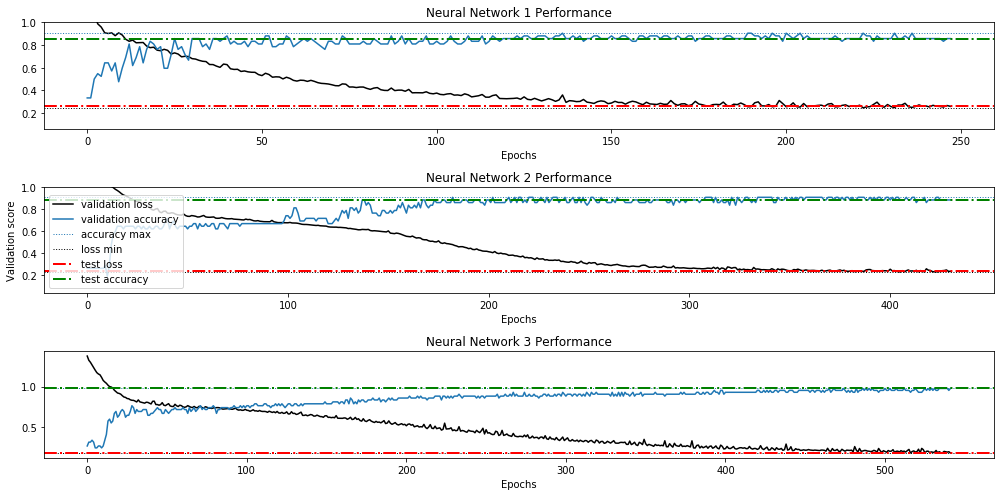

In [11]:
# Create plots
_=plt.figure(figsize=(14,7))
_=plt.subplot(3,1,1)
_=plt.title('Neural Network 1 Performance')
_=plt.plot(nn_fit.history['val_loss'], 'k')
_=plt.plot(nn_fit.history['val_accuracy'])
_=plt.ylim(loss-.2,1)
_=plt.axhline(max(nn_fit.history['val_accuracy']), linestyle=':', linewidth=1)
_=plt.axhline(min(nn_fit.history['val_loss']), linestyle=':', linewidth=1, c='k')
_=plt.axhline(loss, linestyle='-.', linewidth=2, c='r')
_=plt.axhline(accuracy, linestyle='-.', linewidth=2, c='g')
_=plt.xlabel('Epochs')

_=plt.subplot(3,1,2)
_=plt.title('Neural Network 2 Performance')
_=plt.plot(nn2_fit.history['val_loss'], 'k')
_=plt.plot(nn2_fit.history['val_accuracy'])
_=plt.ylim(loss2-.2,1)
_=plt.axhline(max(nn2_fit.history['val_accuracy']), linestyle=':', linewidth=1)
_=plt.axhline(min(nn2_fit.history['val_loss']), linestyle=':', linewidth=1, c='k')
_=plt.axhline(loss2, linestyle='-.', linewidth=2, c='r')
_=plt.axhline(accuracy2, linestyle='-.', linewidth=2, c='g')
_=plt.xlabel('Epochs')
_=plt.ylabel('Validation score')
_=plt.legend(['validation loss','validation accuracy', 'accuracy max', 'loss min', 'test loss', 'test accuracy'])

_=plt.subplot(3,1,3)
_=plt.title('Neural Network 3 Performance')
_=plt.plot(nn3_fit.history['val_loss'], 'k')
_=plt.plot(nn3_fit.history['val_accuracy'])
#_=plt.ylim(loss3-.2,1)
_=plt.axhline(max(nn3_fit.history['val_accuracy']), linestyle=':', linewidth=1)
_=plt.axhline(min(nn3_fit.history['val_loss']), linestyle=':', linewidth=1, c='k')
_=plt.axhline(loss3, linestyle='-.', linewidth=2, c='r')
_=plt.axhline(accuracy3, linestyle='-.', linewidth=2, c='g')
_=plt.xlabel('Epochs')
_=plt.tight_layout()

plt.show()

## Conclusion



The seeds dataset, though small, is rich in information. The logistic regression model performed best, with a neural network showing similar results using features with those highly correlated removed. 